In [1]:
from sklearn.metrics import roc_auc_score

In [107]:
def myROC(result_df, target, color,label=None,asc=False,alpha=1,size=2):
    condition_positive = result_df.iT.sum()
    condition_negative = (~result_df.iT.astype(bool)).astype(int).sum()

    doof = result_df.sort_values(by = [target], ascending=asc ).copy()
    doof['TPr'] = doof.iT.cumsum() / condition_positive
    doof['FPr'] = (~doof.iT.astype(bool)).astype(int).cumsum() / condition_negative
    roc_fool = doof[['iT',target]].dropna()
    rocscore = roc_auc_score(y_true = roc_fool.iT.values , 
                                y_score = roc_fool[target].values)
        
    if not label:
        label=target+" {}".format(rocscore)
    else:
        print(label, rocscore)
    
    x = doof.FPr.values
    y = doof.TPr.values
    ax.plot(x,y, color=color, label=label, 
            linewidth=size, alpha=alpha)

# The test datasets

# Nimrod

In [3]:
test_hg = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/M1957_hgstages_test.tsv",sep='\t', index_col=0)
test_mm = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/M1957_mmstages_test.tsv", sep='\t')

In [4]:
test_hg.head(3)

chrom   start     end    stage      score  iT strand   set    nimrod
2   chr10  180860  180879  gm12878   8.960501   0      +  test -0.924612
8   chr10  182235  182254  gm12878   8.979525   0      +  test -0.881062
15  chr10  557124  557143  gm12878  11.519602   1      +  test  0.999923

In [5]:
roc_auc_score(y_true=test_hg.iT, y_score=test_hg.nimrod)

0.94141347057453806

In [6]:
roc_auc_score(y_true=test_mm.iT, y_score=test_mm.nimrod)

0.94680885087984112

# PIQ

In [7]:
piqdf = pd.read_csv(
"/home/ska/panos/myphdthesis/data/nimrod_results/PIQ_M1957_mm10_test.tsv",
    sep='\t')
piqdfHG = pd.read_csv(
"/home/ska/panos/myphdthesis/data/nimrod_results/PIQ_M1957_hg_test.tsv",
    sep='\t')

In [8]:
piqdfHG.head()

chrom    start      end    stage      score  iT strand   set  piqPWMscore  \
0  chr10   557124   557143  gm12878  11.519602   1      +  test    13.832003   
1  chr10  3281983  3282002  gm12878  10.559451   1      +  test    10.857716   
2  chr10  4169857  4169876  gm12878   9.854362   0      +  test     6.710907   
3  chr10  5855822  5855841  gm12878   9.538491   0      +  test     6.651681   
4  chr10  9385001  9385020  gm12878  10.470723   1      +  test    10.217523   

   piq_shape  piq_score  piq_purity  
0   1.372121  18.535739    0.991616  
1   1.535512  16.121568    0.979517  
2   1.190922  10.793478    0.794906  
3   1.230897  10.871288    0.799814  
4   1.352957  14.855561    0.958986

In [9]:
roc_auc_score(y_true=piqdf.iT, y_score=piqdf.piq_score)

0.72839837069813251

In [10]:
roc_auc_score(y_true=piqdfHG.iT, y_score=piqdfHG.piq_score)

0.68380661765289052

# TFimp

In [11]:
test_hg_tfimpshaped = (
    pd.read_csv(
    "/home/ska/panos/myphdthesis/data/nimrod_results/TFimp_M1957_hg_test.tsv",
        sep='\t',index_col=0))
test_mm_tfimpshaped = (
    pd.read_csv(
    "/home/ska/panos/myphdthesis/data/nimrod_results/TFimp_M1957_mm_test.tsv",
        sep='\t',index_col=0))

In [12]:
test_hg_tfimpshaped.head()

chrom    start      end    stage      score  iT strand   set    tfimp
2   chr10   180860   180879  gm12878   8.960501   0      +  test  0.03099
8   chr10   182235   182254  gm12878   8.979525   0      +  test  0.02101
15  chr10   557124   557143  gm12878  11.519602   1      +  test  0.77316
25  chr10  1034334  1034353  gm12878   8.911995   1      -  test  0.04103
35  chr10  1102754  1102773  gm12878   9.298795   0      -  test  0.02018

In [13]:
roc_auc_score(y_true=test_hg_tfimpshaped.iT, y_score=test_hg_tfimpshaped.tfimp)

0.9072391764588712

In [14]:
roc_auc_score(y_true=test_mm_tfimpshaped.iT, y_score=test_mm_tfimpshaped.tfimp)

0.90490582554448951

# Wellington

In [15]:
test_hg_w = (pd
.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/WLNGTN_M1957_hg_test.tsv",
                    sep='\t',index_col=0))
test_mm_w = (pd
.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/WLNGTN_M1957_mm_test.tsv",
                    sep='\t',index_col=0))

In [16]:
(roc_auc_score(y_true=test_hg_w.iT,
              y_score=test_hg_w.wellington),
roc_auc_score(y_true=test_mm_w.iT, y_score=test_mm_w.wellington))

(0.65243061173182104, 0.64335730365204857)

In [17]:
colors = sns.color_palette("colorblind", 8)

In [18]:
outname='tfigure_roxExample'

Fwidth = THESIS_PAGEWIDTH/2
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.15, right=.99, top=.9)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
plt.title('A ROC curve')
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

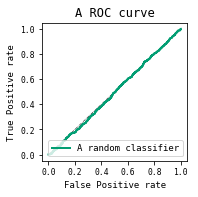

In [106]:
outname='tfigure_roxExample2'

Fwidth = THESIS_PAGEWIDTH/2
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.15, right=.99, top=.9)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(test_hg_w[test_hg_w['stage']=='k562'], 'wellington',color = colors[2], size=2)
plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
# replace labels
new_labels = ['A random classifier']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

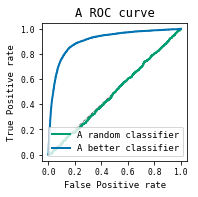

In [105]:
outname='tfigure_roxExample3'
Fwidth = THESIS_PAGEWIDTH/2
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.15, right=.99, top=.9)
ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(test_hg_w[test_hg_w['stage']=='k562'], 'wellington',color = colors[2], size=2)
myROC(test_hg_tfimpshaped, 'tfimp',color = colors[0], size=2)
plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
# replace labels
new_labels = ['A random classifier', 'A better classifier']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
   
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

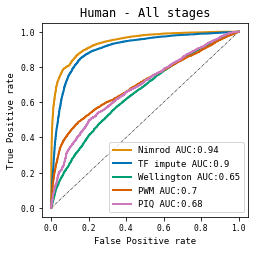

In [108]:
outname='tfigure_rocOthers'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)
ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(test_hg, 'nimrod',color = colors[1])
myROC(test_hg_tfimpshaped, 'tfimp',color = colors[0])
myROC(test_hg_w, 'wellington',color = colors[2])
myROC(test_hg, 'score',color = colors[3])
myROC(piqdfHG,'piq_score',color = colors[4])

plt.title('Human - All stages')
lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.94',
              'TF impute AUC:0.9',
              'Wellington AUC:0.65',
              'PWM AUC:0.7',
              'PIQ AUC:0.68']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

A better classifier 0.907239176459
PWM score 0.702209847852


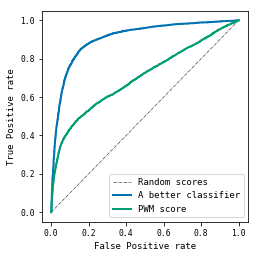

In [126]:
outname='tfigure_Rnimrod_ROC0'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.99)


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.', label='Random scores')
# myROC(test_hg, 'nimrod',color = colors[1])
myROC(test_hg_tfimpshaped, 'tfimp',color = colors[0], label='A better classifier')
# myROC(test_hg_w, 'wellington',color = colors[2])
myROC(test_hg, 'score',color = colors[2], label='PWM score')
# myROC(piqdfHG,'piq_score',color = colors[4])

# plt.title('Human - All stages')
lgnd = plt.legend(loc='lower right')

# #change the marker size manually for both lines
# lgnd.legendHandles[0]._sizes = [45]
# lgnd.legendHandles[1]._sizes = [45]
# lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
# new_labels = ['Nimrod AUC:0.94',
#               'TF impute AUC:0.9',
#               'Wellington AUC:0.65',
#               'PWM AUC:0.7',
#               'PIQ AUC:0.68']
# for t, l in zip(lgnd.texts, new_labels): 
#     t.set_text(l)

ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

In [110]:
outname='tfigure_NEWct_ctcf_hg'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(test_hg, 'nimrod',color = 'black',alpha=1,size=4)

myROC(test_hg_tfimpshaped, 'tfimp',color = 'grey', size=1)
myROC(test_hg_w, 'wellington',color = 'grey', size=1)
myROC(test_hg, 'score',color = 'grey', size=1)
myROC(piqdfHG,'piq_score',color = 'grey', size=1)

n = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/nimrod_mm_trans.csv",
               sep='\t')
n['iT'] = np.argmax(n[['labels_0','labels_1']].values,
                    axis=1)
n['nimrod'] = n['logits_1'] - n['logits_0']
myROC(n, 'nimrod',color = colors[1], size=4)


plt.title('CTCF Human dataset')
lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
lgnd.legendHandles[5]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.94',
              'TF impute AUC:0.9',
              'Wellington AUC:0.65',
              'PWM AUC:0.7',
              'PIQ AUC:0.68',
              'Nimrod-trans AUC:0.94']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

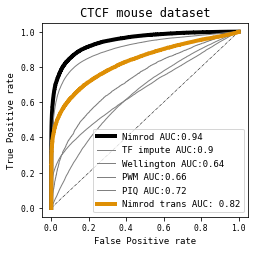

In [111]:
outname='tfigure_NEWct_ctcf_mm'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROCal(test_mm, 'nimrod',color = 'black', size=4)
myROCal(test_mm_tfimpshaped, 'tfimp',color = 'grey', size=1)
myROCal(test_mm_w, 'wellington',color = 'grey', size=1)
myROCal(test_mm, 'score',color = 'grey', size=1)
myROCal(piqdf,'piq_score',color = 'grey', size=1)

n = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/nimrod_hg_trans.csv",
               sep='\t')
n['iT'] = np.argmax(n[['labels_0','labels_1']].values,
                    axis=1)
n['nimrod'] = n['logits_1'] - n['logits_0']
myROCal(n, 'nimrod',color = colors[1], size=4)


plt.title('CTCF mouse dataset')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
lgnd.legendHandles[5]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.94',
                'TF impute AUC:0.9',
              'Wellington AUC:0.64',
              'PWM AUC:0.66',
              'PIQ AUC:0.72',
             'Nimrod trans AUC: 0.82']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

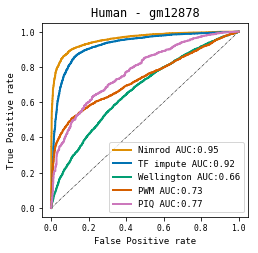

In [112]:
outname='tfigure_rocOthers_gm12878'
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, 
        linestyle='-.')
myROC(test_hg[test_hg.stage == 'gm12878'],
      'nimrod',color = colors[1])
myROC(test_hg_tfimpshaped[test_hg_tfimpshaped.stage == 'gm12878'],
      'tfimp',color = colors[0])
myROC(test_hg_w[test_hg_w.stage == 'gm12878'], 
      'wellington',color = colors[2])
myROC(test_hg[test_hg.stage == 'gm12878'], 
      'score',color = colors[3])
myROC(piqdfHG[piqdfHG.stage == 'gm12878'],
      'piq_score',color = colors[4])

plt.title('Human - gm12878')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.95',
              'TF impute AUC:0.92',
              'Wellington AUC:0.66',
              'PWM AUC:0.73',
              'PIQ AUC:0.77']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))

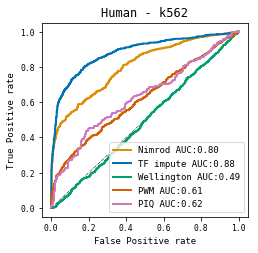

In [113]:
outname='tfigure_rocOthers_k562'
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', 
        linewidth=0.5, linestyle='-.')
myROC(test_hg[test_hg.stage == 'k562'], 
      'nimrod',color = colors[1])
myROC(test_hg_tfimpshaped[test_hg_tfimpshaped.stage == 'k562'],
      'tfimp',color = colors[0])
myROC(test_hg_w[test_hg_w.stage == 'k562'], 
      'wellington',color = colors[2])
myROC(test_hg[test_hg.stage == 'k562'], 
      'score',color = colors[3])
myROC(piqdfHG[piqdfHG.stage == 'k562'],
      'piq_score',color = colors[4])

plt.title('Human - k562')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.80',
              'TF impute AUC:0.88',
              'Wellington AUC:0.49',
              'PWM AUC:0.61',
              'PIQ AUC:0.62']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
  
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))

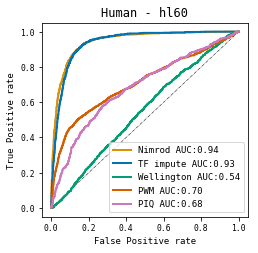

In [114]:
outname='tfigure_rocOthers_hl60'
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5,
        linestyle='-.')
myROC(test_hg[test_hg.stage == 'hl60'], 
      'nimrod',color = colors[1])
myROC(test_hg_tfimpshaped[test_hg_tfimpshaped.stage == 'hl60'],
      'tfimp',color = colors[0])
myROC(test_hg_w[test_hg_w.stage == 'hl60'],
      'wellington',color = colors[2])
myROC(test_hg[test_hg.stage == 'hl60'], 
      'score',color = colors[3])
myROC(piqdfHG[piqdfHG.stage == 'hl60'],
      'piq_score',color = colors[4])

plt.title('Human - hl60')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.94',
              'TF impute AUC:0.93',
              'Wellington AUC:0.54',
              'PWM AUC:0.70',
              'PIQ AUC:0.68']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))

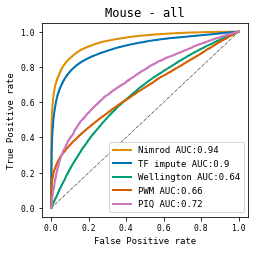

In [115]:
outname='tfigure_rocOthers_mmall'
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, 
        linestyle='-.')
myROC(test_mm, 'nimrod',color = colors[1])
myROC(test_mm_tfimpshaped, 'tfimp',color = colors[0])
myROC(test_mm_w, 'wellington',color = colors[2])
myROC(test_mm, 'score',color = colors[3])
myROC(piqdf,'piq_score',color = colors[4])

plt.title('Mouse - all')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
lgnd.legendHandles[4]._sizes = [45]
# replace labels
new_labels = ['Nimrod AUC:0.94',
                'TF impute AUC:0.9',
              'Wellington AUC:0.64',
              'PWM AUC:0.66',
              'PIQ AUC:0.72']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))

In [26]:
# This plots all the mm stages individually, creates a lot of plots
# so im hiding it on default
# for stage in test_mm.stage.unique():
#   try:
#     fig, ax = plt.subplots(1,1,figsize=(7,7)) 
#     myROC(test_mm[test_mm['stage']==stage],
#          'nimrod',color = colors[1])
#     myROC(test_mm_tfimpshaped[test_mm_tfimpshaped['stage']==stage],
#          'tfimp',color = colors[0])
#     myROC(test_mm_w[test_mm_w['stage']==stage],
#          'wellington',color = colors[2])
#     myROC(test_mm[test_mm['stage']==stage],
#          'score',color = colors[3])
#     myROC(piqdf[piqdf['stage']==stage],
#          'piq_score',color = colors[4])
#     ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

#     # Plot legend.
#     lgnd = plt.legend()
#     # #change the marker size manually for both lines
#     lgnd.legendHandles[0]._sizes = [45]
#     lgnd.legendHandles[1]._sizes = [45]
#     lgnd.legendHandles[2]._sizes = [45]
#     lgnd.legendHandles[3]._sizes = [45]
#     lgnd.legendHandles[4]._sizes = [45]

#     # replace labels
#     # new_labels = [
#     #               'Nimrod AUC:0.95',
#     #                 'TF impute AUC:0.91',
#     #               'Wellington AUC:0.67',
#     #               'PWM AUC:0.71',
#     #               'PIQ AUC:0.69']
#     # for t, l in zip(lgnd.texts, new_labels): 
#     #     t.set_text(l)

#     plt.xlabel('False Positive rate')
#     plt.ylabel('True Positive rate')
#     plt.title('{}'.format(stage))

# #         plt.savefig("./rocfigures/roc4_{}.png".format(stage))
#   except:
#     continue

# Cross Species

tfimp_mm_trans 0.893384394709
nimrod 0.940780642931


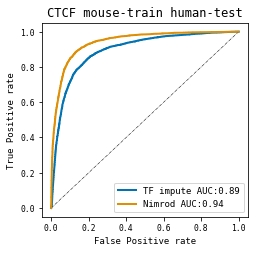

In [118]:
outname = 'roc_CTCF_mm_trans'
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)
#TFIMP
fp = "/home/ska/panos/myphdthesis/data/nimrod_results/tfimp_mm_trans.prediction"
name = fp.split("/")[-1][:-11]
l = pd.read_csv(fp,sep='\t',header=None)
l.columns = ['iT','tfimp']
myROC(l, 'tfimp',color = colors[0],label=name)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
#NIMROD
n = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/nimrod_mm_trans.csv",
               sep='\t')
n['iT'] = np.argmax(n[['labels_0','labels_1']].values,
                    axis=1)
n['nimrod'] = n['logits_1'] - n['logits_0']
myROC(n, 'nimrod',color = colors[1],label='nimrod')

plt.title('CTCF mouse-train human-test')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
new_labels = ['TF impute AUC:0.89',
               'Nimrod AUC:0.94']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))

tfimp_hg_trans 0.839409555168
nimrod 0.829016069339


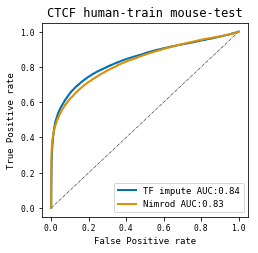

In [119]:
outname="roc_CTCF_hg_trans"
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)
fp = "/home/ska/panos/myphdthesis/data/nimrod_results/tfimp_hg_trans.prediction"
name = fp.split("/")[-1][:-11]
l = pd.read_csv(fp,sep='\t',header=None)
l.columns = ['iT','tfimp']
myROC(l, 'tfimp',color = colors[0],label=name)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
#NIMROD
n = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_results/nimrod_hg_trans.csv",
               sep='\t')
n['iT'] = np.argmax(n[['labels_0','labels_1']].values,
                    axis=1)
n['nimrod'] = n['logits_1'] - n['logits_0']
myROC(n, 'nimrod',color = colors[1],label='nimrod')

plt.title('CTCF human-train mouse-test')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
new_labels = ['TF impute AUC:0.84',
               'Nimrod AUC:0.83']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'
            .format(outname))